In [309]:

import pandas as pd
pd.options.display.max_colwidth = 80

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.svm import SVC # SVM model with kernels
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import warnings

import seaborn as sn
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

 

In [310]:
data = './data/car_evaluation.csv'

header_list = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv(data, names=header_list, index_col=None)



In [311]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [312]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [313]:
for column in df.columns:
    print(df[column].value_counts(), '\n') 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

2       576
4       576
more    576
Name: persons, dtype: int64 

small    576
med      576
big      576
Name: lug_boot, dtype: int64 

low     576
med     576
high    576
Name: safety, dtype: int64 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [314]:
 
X = df.drop(['class'], axis=1) 
y = df['class']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [316]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

columns_encode = []
columns_encode.append(col_names)
columns_encode

[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]

In [320]:
ordinal_encoder = OrdinalEncoder()

X_train = ordinal_encoder.fit_transform(X_train, columns_encode)
X_test = ordinal_encoder.transform(X_test)

In [321]:
param_grid = [{'kernel': ['poly'], 'C' : [3, 5, 7, 9, 10]},
             {'kernel' : ['rbf'], 'C' : [3, 5, 7, 9, 10], 'gamma' : [2, 4, 6, 8]}]

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [3, 5, 7, 9, 10], 'kernel': ['poly']},
                         {'C': [3, 5, 7, 9, 10], 'gamma': [2, 4, 6, 8],
                          'kernel': ['rbf']}],
             return_train_score=True)

In [322]:
grid_search.best_params_

{'C': 9, 'kernel': 'poly'}

In [323]:
grid_search.best_estimator_

SVC(C=9, kernel='poly')

In [324]:
svm_y_pred = grid_search.predict(X_test)

accuracy_score(y_test, svm_y_pred)

0.8815028901734104

In [325]:
svm_y_pred_train = grid_search.predict(X_train)

accuracy_score(y_train, svm_y_pred_train)


0.9054054054054054

In [326]:
confusion_matrix(y_test, svm_y_pred)

array([[107,   3,  39,   7],
       [  2,  22,   5,   0],
       [ 14,   0, 465,   1],
       [  6,   0,   5,  16]], dtype=int64)

In [327]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

         acc       0.83      0.69      0.75       156
        good       0.88      0.76      0.81        29
       unacc       0.90      0.97      0.94       480
       vgood       0.67      0.59      0.63        27

    accuracy                           0.88       692
   macro avg       0.82      0.75      0.78       692
weighted avg       0.88      0.88      0.88       692



In [416]:
'''
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', class]
array= 0 , 2, 2, -,2, 2, good

buying       v-high, high, med, low
maint        v-high, high, med, low
doors        2, 3, 4, 5-more
persons      2, 4, more
lug_boot     small, med, big
safety       low, med, high

Maintenance = High Number of doors = 4 Lug Boot Size = Big Safety = High Class Value = Good

[y,2,2,-,2,2,2,good]
'''

for y in range(0,len(svm_y_pred)):
    if svm_y_pred[y] == 'good':
        
        if (X_test[y][1] == 2 and X_test[y][2] == 2 and  X_test[y][5] == 2   ) :
            print(y)
            print(X_test[y])
              


445
[1. 2. 2. 2. 0. 2.]


In [348]:
print(y_test.iloc[445])

good


In [417]:
for y in range(0,len(svm_y_pred_train)):
    if svm_y_pred_train[y] == 'good':
        
        if (X_train[y][1] == 2 and X_train[y][2] == 2 and  X_train[y][5] == 2   ) :
            print(y)
            print(X_train[y])

709
[1. 2. 2. 2. 1. 2.]
824
[1. 2. 2. 1. 0. 2.]
944
[1. 2. 2. 1. 1. 2.]


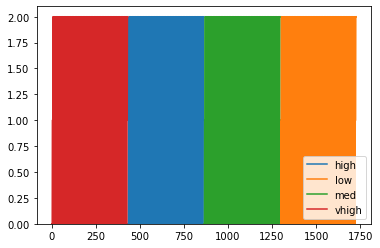

In [418]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
encd_X = np.concatenate((X_train,X_test),axis=0)
 
df.groupby('buying')['lug_boot1'].plot(legend=True)
df['lug_boot1'] = pd.factorize( df['lug_boot'] )[0]
df['buying1'] = pd.factorize( df['buying'] )[0]
plt.bar(df['buying1'], df['lug_boot1'])
plt.show()

In [ ]:
"Ans is = 2 Medium price"

In [ ]:
"I have tried to run the model using buying as prediction class but it is not working due to the data skewness"

In [ ]:
"Thus I find all prediction of class with 'good' and look for data cloeset to the require specs "

In [ ]:
"I found [1. 2. 2. 2. 0. 2.] , [1. 2. 2. 2. 1. 2.] ,[1. 2. 2. 1. 0. 2.] and [1. 2. 2. 1. 1. 2.] which are all encoding "
"for related columns and most prediction is buying at 1 which is Medium price "

In [ ]:
#The only variable can't be account for in the data is lug boot but as I measure the relationship 
#with lug_boot with buying price and found is evenly distributed.
#I thus conclude is not an important variable and the prediction of medium is safe and highly possible

